### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})

#### Import the Data

In [2]:
uber_airport_data = pd.read_csv('Uber Request Data.csv')
uber_airport_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Data Description : 
The input dataset has the following six attributes:

1. **`Request ID`**: A unique token representing a customer request.<br>
2. **`Pickup point`**: Customer pickup point with two levels based on customer's location (City-represents customers to be picked up at the city and dropped to the airport; Airport-represents customers to be picked up from the airport and dropped to the city).<br>
3. **`Driver ID`**: Unique identification number of a driver.<br>
4. **`Status`**: It represents the customer request status and may take up one of three possible values; trip completed, cancelled or no cars available.<br>
5. **`Request Timestamp`**: Contains date and time information at which the request was registered.<br>
6. **`Drop Timestamp`**: Contains date and time information at which the trip was completed.

In [3]:
# Check for the dataset columns and datatypes
uber_airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [4]:
# Check for summary statistics
uber_airport_data.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,12/7/2016 21:53
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [5]:
# Check the number of NaN values for each column
uber_airport_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
# Check the status for which drop timestamp is not available
uber_airport_data[uber_airport_data['Drop timestamp'].isnull()]['Status'].value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

### Data Cleaning and Manipulation

In [7]:
# Converting request and drop timestamp to datetime value from object datatype
uber_airport_data['Request timestamp'] = pd.to_datetime(uber_airport_data['Request timestamp'],dayfirst=True)
uber_airport_data['Drop timestamp'] = pd.to_datetime(uber_airport_data['Drop timestamp'],dayfirst=True)
uber_airport_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [8]:
# Verify the changed datatype
uber_airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [9]:
# Create derived metrics which will be useful for later analysis
day_name_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

uber_airport_data['Request Date'] = uber_airport_data['Request timestamp'].dt.date
uber_airport_data['Request Hour'] = uber_airport_data['Request timestamp'].dt.hour
uber_airport_data['Request Day'] = uber_airport_data['Request timestamp'].dt.dayofweek.map(day_name_dict)
uber_airport_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday


In [11]:
def get_time_slot(x):
    if x >= 5 and x <= 10 :
        slot = 'Morning Peak Hour'
    elif x > 10 and x <= 14:
        slot = 'Noon'
    elif x > 14 and x <= 17 :
        slot = 'Afternoon'
    elif x > 17 and x <= 21:
        slot = 'Evening Rush'
    elif x > 21 and x <= 23 or x == 0:
        slot = 'Night'
    else:
        slot = 'Midnight'
    return slot

In [12]:
uber_airport_data['Time Slot'] = uber_airport_data['Request Hour'].apply(get_time_slot)
uber_airport_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Morning Peak Hour
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Morning Peak Hour


### Data Analysis

In [13]:
# Idenitfy the frequency of request status
status_group_df = pd.DataFrame(uber_airport_data.groupby('Status').size()).reset_index().rename(columns={0:'Number of Requests'})
total_num_requests = status_group_df['Number of Requests'].sum()
status_group_df['Percentage of Total Request'] = round((status_group_df['Number of Requests']/total_num_requests)*100,2)
status_group_df

,Status,Number of Requests,Percentage of Total Request
0,Cancelled,1264,18.74
1,No Cars Available,2650,39.29
2,Trip Completed,2831,41.97


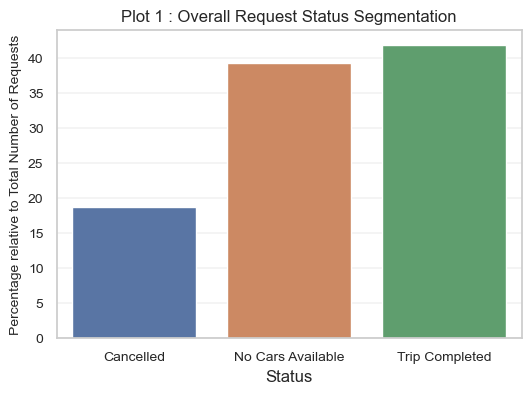

In [16]:
# Visualize the above observation
plt.figure(figsize=(6,4))

ax = sns.barplot(data=status_group_df,x='Status',y='Percentage of Total Request')
ax.set_title('Plot 1 : Overall Request Status Segmentation',fontsize=12)
ax.set_ylabel("Percentage relative to Total Number of Requests",fontsize=10)
ax.tick_params(labelsize=10)
plt.show()

**Observation** : The issue of `No Cars Available` is almost the same percentage as `Trip Completed` by uber drivers. So, we can see that unavailability of cars might be a very big problem for Uber if not tackled fast. 

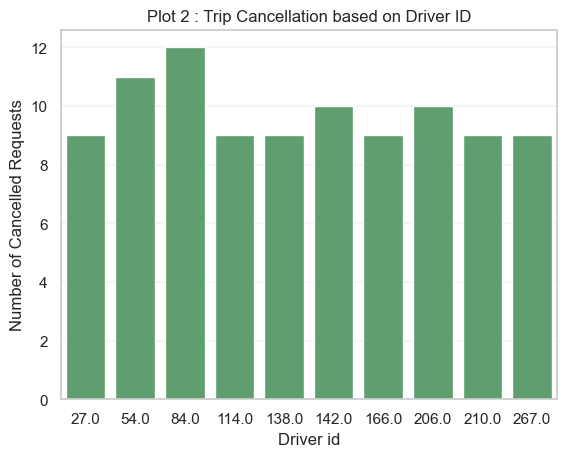

In [17]:
# Check the top 10 drivers with most cancellation request
driver = pd.DataFrame(uber_airport_data[uber_airport_data.Status=='Cancelled'].groupby('Driver id').size()).reset_index().rename(columns={0:'Number of Cancelled Requests'})
top_10_driver_cancellation = driver.sort_values('Number of Cancelled Requests',ascending=False).head(10)

ax = sns.barplot(data=top_10_driver_cancellation,x='Driver id',y='Number of Cancelled Requests',color='g')
ax.set_title('Plot 2 : Trip Cancellation based on Driver ID',fontsize=12)
plt.show()

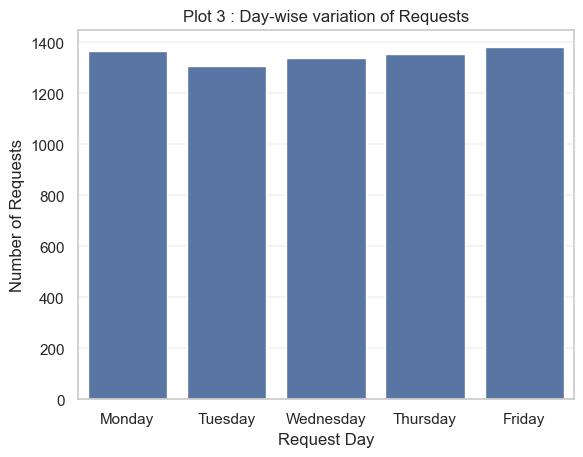

In [19]:
# Day-wise variation of requests
ax = sns.countplot(data=uber_airport_data,x='Request Day',color='b')
ax.set_title('Plot 3 : Day-wise variation of Requests',fontsize=12)
ax.set_ylabel('Number of Requests')
plt.show()

From above Plot,  we can see there is minimal variation in the number of requests generated with respect to the days of the week.

#### 3.1.1. Identify the most pressing problems for Uber

We will analyse the dataset and identify the most pressing problems faced by Uber: <br>

a. Identify the most problematic types of requests (city to airport / airport to city )<br>
b. Identify the most problematic time slots

In [21]:
# Status segmentation based on Pickup Point
uber_status_by_pickup = pd.DataFrame(uber_airport_data.groupby(['Status','Pickup point']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_pickup = uber_status_by_pickup.sort_values(['Status','Number of Requests'],ascending=[True,False])
uber_status_by_pickup

,Status,Pickup point,Number of Requests
1,Cancelled,City,1066
0,Cancelled,Airport,198
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
5,Trip Completed,City,1504
4,Trip Completed,Airport,1327


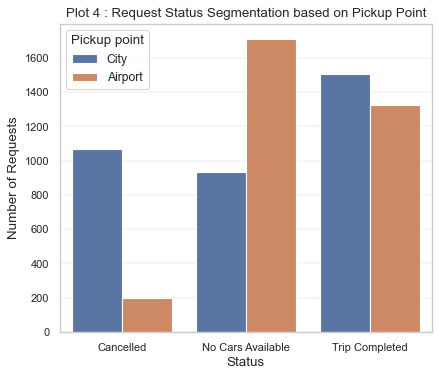

In [24]:
plt.figure(figsize=(6,5),dpi=80)
ax = sns.barplot(data=uber_status_by_pickup,x='Status',y='Number of Requests',hue='Pickup point')
ax.set_title('Plot 4 : Request Status Segmentation based on Pickup Point',fontsize=12)
ax.tick_params(labelsize=10)
plt.show()

In [23]:
# Check for customer deniability w.r.t pickup point
uber_customer_denied = uber_airport_data[uber_airport_data['Status'].isin(['Cancelled','No Cars Available'])]
uber_customer_denied_based_on_pickup = pd.DataFrame(uber_customer_denied.groupby('Pickup point').size()).reset_index().rename(columns={0:'Number of Requests Denied'})
uber_customer_denied_based_on_pickup

,Pickup point,Number of Requests Denied
0,Airport,1911
1,City,2003


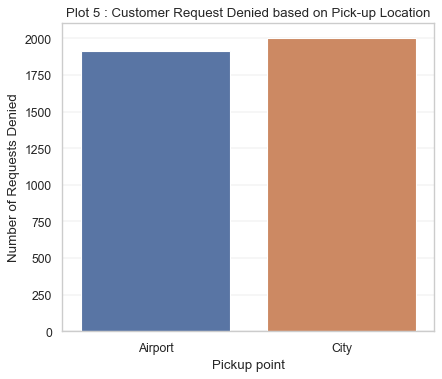

In [26]:
plt.figure(figsize=(6,5),dpi=80)
ax = sns.barplot(data=uber_customer_denied_based_on_pickup,x='Pickup point',y='Number of Requests Denied')
ax.set_title('Plot 5 : Customer Request Denied based on Pick-up Location',fontsize=12)
plt.show()

**`Observation`**: From Plot 4. we can observe that the number of cancellation requests are high for city pickup and number of no cars available requests are high for airport pickup. Also Plot 5. shows us that a higher number of requests are denied with customer pickup location as city than that of airport. Therefore a higher percentage of customers booking Uber from airport are denied service. Hence customer requests with pickup location specified as airport are more problematic and more likely to be denied service.

#### `Observation 'a'`. Most Problematic Request Type : `Airport to City`

In [27]:
# Status segmentation based on time slots
uber_status_by_time_slot = pd.DataFrame(uber_airport_data.groupby(['Time Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot = uber_status_by_time_slot.sort_values(['Time Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot.head(10)

,Time Slot,Status,Number of Requests
2,Afternoon,Trip Completed,344
1,Afternoon,No Cars Available,326
0,Afternoon,Cancelled,78
4,Evening Rush,No Cars Available,1160
5,Evening Rush,Trip Completed,633
3,Evening Rush,Cancelled,131
7,Midnight,No Cars Available,243
8,Midnight,Trip Completed,174
6,Midnight,Cancelled,62
11,Morning Peak Hour,Trip Completed,970


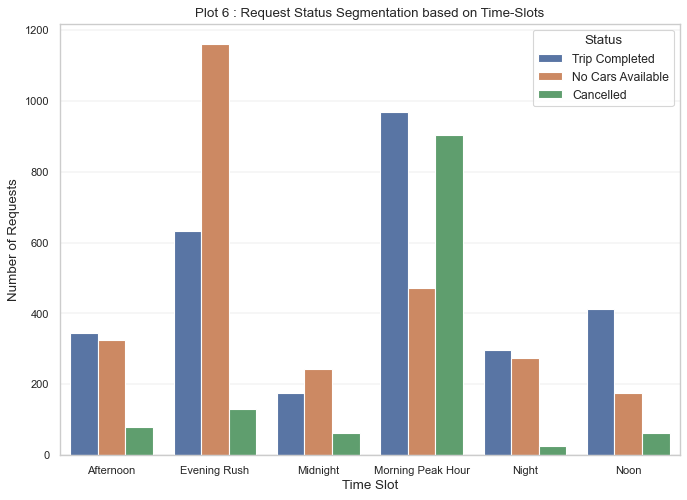

In [29]:
plt.figure(figsize=(10,7),dpi=80)
ax = sns.barplot(data=uber_status_by_time_slot,x='Time Slot',y='Number of Requests',hue='Status')
ax.set_title('Plot 6 : Request Status Segmentation based on Time-Slots',fontsize=12)
ax.tick_params(labelsize=10)

From the above plot we can observe that the number of cancellation requests are high during morning peak hour and during evening rush hour there is a surge in no car available status. Clearly 'Morning Peak Hour' and 'Evening Rush' are the most problematic time-slots contributing to the highest gap in overall supply and demand.

#### `Observation 'b'`. Most Problematic Time Slots : Morning Peak Hour[5 AM - 10 AM] and Evening Rush[5 PM - 9 PM]

In [30]:
# Status segmentation based on time slots and pickup point
uber_city_pickup = uber_airport_data[uber_airport_data['Pickup point'] == 'City']
uber_airport_pickup = uber_airport_data[uber_airport_data['Pickup point'] == 'Airport']

In [31]:
uber_status_by_time_slot_city = pd.DataFrame(uber_city_pickup.groupby(['Time Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_city = uber_status_by_time_slot_city.sort_values(['Time Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_city.head(6)

,Time Slot,Status,Number of Requests
2,Afternoon,Trip Completed,180
1,Afternoon,No Cars Available,89
0,Afternoon,Cancelled,34
5,Evening Rush,Trip Completed,334
4,Evening Rush,No Cars Available,54
3,Evening Rush,Cancelled,44


In [32]:
uber_status_by_time_slot_airport = pd.DataFrame(uber_airport_pickup.groupby(['Time Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_airport = uber_status_by_time_slot_airport.sort_values(['Time Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_airport.head(6)

,Time Slot,Status,Number of Requests
1,Afternoon,No Cars Available,237
2,Afternoon,Trip Completed,164
0,Afternoon,Cancelled,44
4,Evening Rush,No Cars Available,1106
5,Evening Rush,Trip Completed,299
3,Evening Rush,Cancelled,87


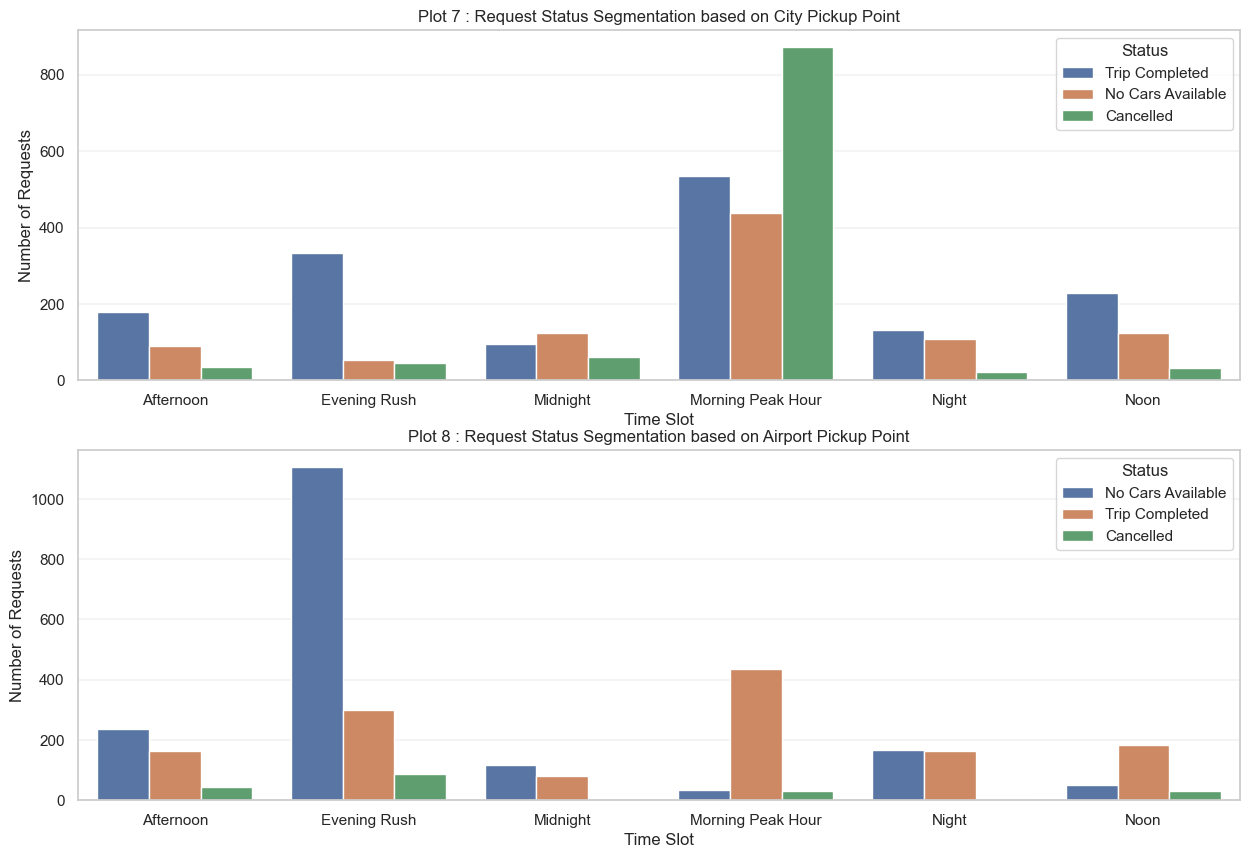

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
ax = sns.barplot(data=uber_status_by_time_slot_city,x='Time Slot',y='Number of Requests',hue='Status')
ax.set_title('Plot 7 : Request Status Segmentation based on City Pickup Point')

plt.subplot(2, 1, 2)
ay = sns.barplot(data=uber_status_by_time_slot_airport,x='Time Slot',y='Number of Requests',hue='Status')
ay.set_title('Plot 8 : Request Status Segmentation based on Airport Pickup Point')
plt.show()

On further inspection of the problematic time-slots in Plot 6. , we generated Plot 7. for customers booking cab from city to airport and Plot 8. for customers booking cab from airport to city.

#### 3.1.2. Gap between Supply and Demand

We will find out the gap between supply and demand based on the folliwng parameters :

a. Find time-slots when highest gap exists.<br>
b. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.

In [35]:
uber_hourly_status = pd.DataFrame(uber_airport_data.groupby(['Request Hour','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_hourly_status.head()

,Request Hour,Status,Number of Requests
0,0,Cancelled,3
1,0,No Cars Available,56
2,0,Trip Completed,40
3,1,Cancelled,4
4,1,No Cars Available,56


In [36]:
uber_hourly_status_transpose = pd.pivot_table(data=uber_hourly_status,columns='Status',values='Number of Requests',index='Request Hour')
uber_hourly_status_transpose = uber_hourly_status_transpose.reset_index().rename_axis(None,axis=1)
uber_hourly_status_transpose['Demand'] = uber_hourly_status_transpose.sum(axis=1)
uber_hourly_status_transpose['Supply'] = uber_hourly_status_transpose['Trip Completed']
uber_hourly_status_transpose['Gap'] = uber_hourly_status_transpose['Demand'] - uber_hourly_status_transpose['Supply']
uber_hourly_status_transpose.head()

,Request Hour,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,0,3,56,40,99,40,59
1,1,4,56,25,86,25,61
2,2,5,57,37,101,37,64
3,3,2,56,34,95,34,61
4,4,51,74,78,207,78,129


In [37]:
uber_hourly_total_metric = pd.melt(uber_hourly_status_transpose.loc[:,['Request Hour','Demand','Supply','Gap']], id_vars=['Request Hour'], var_name="Request Metric", value_name="Number of Requests").sort_values('Request Hour')
uber_hourly_total_metric.head(10)

,Request Hour,Request Metric,Number of Requests
0,0,Demand,99
48,0,Gap,59
24,0,Supply,40
1,1,Demand,86
49,1,Gap,61
25,1,Supply,25
2,2,Demand,101
50,2,Gap,64
26,2,Supply,37
51,3,Gap,61


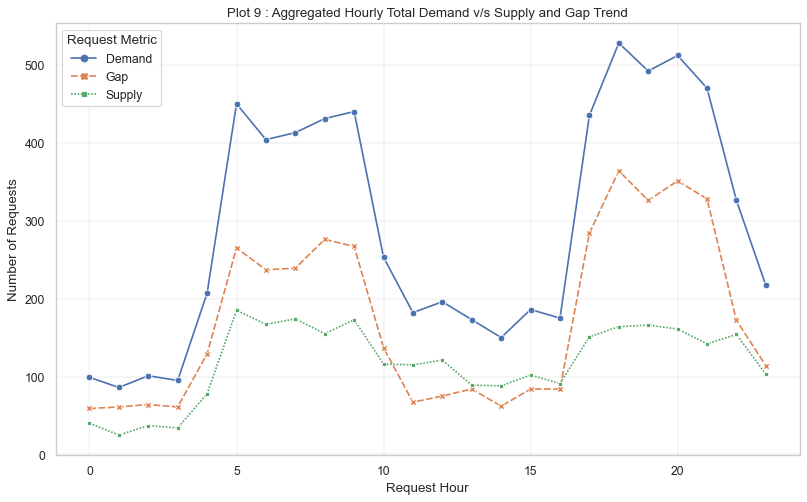

In [38]:
plt.figure(figsize=(12,7),dpi=80)
ax = sns.lineplot(data=uber_hourly_total_metric,x='Request Hour',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Plot 9 : Aggregated Hourly Total Demand v/s Supply and Gap Trend',fontsize=12)
plt.show()

We chose a line plot to visualise the supply-demand gap since it clearly depicts the hourly trend of demand vs supply and the gap variation throughout the day. It is clearly evident from the plot that the highest gap exists from 5 AM to 9 AM(morning peak hour) and between 5 pm and 9 pm in the evening(evening rush).

In [39]:
uber_status_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot,columns='Status',values='Number of Requests',index='Time Slot')
uber_status_timeslot_transpose = uber_status_timeslot_transpose.reset_index().rename_axis(None,axis=1)

uber_status_timeslot_transpose['Demand'] = uber_status_timeslot_transpose.sum(axis=1)
uber_status_timeslot_transpose['Supply'] = uber_status_timeslot_transpose['Trip Completed']
uber_status_timeslot_transpose['Gap'] = uber_status_timeslot_transpose['Demand'] - uber_status_timeslot_transpose['Supply']

In [40]:
uber_status_timeslot_transpose

,Time Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Afternoon,78,326,344,748,344,404
1,Evening Rush,131,1160,633,1924,633,1291
2,Midnight,62,243,174,479,174,305
3,Morning Peak Hour,905,471,970,2346,970,1376
4,Night,25,275,297,597,297,300
5,Noon,63,175,413,651,413,238


In [41]:
uber_status_timeslot_transpose.loc[:,['Time Slot','Demand','Supply','Gap']]

,Time Slot,Demand,Supply,Gap
0,Afternoon,748,344,404
1,Evening Rush,1924,633,1291
2,Midnight,479,174,305
3,Morning Peak Hour,2346,970,1376
4,Night,597,297,300
5,Noon,651,413,238


In [42]:
uber_timeslot_total_metric = pd.melt(uber_status_timeslot_transpose.loc[:,['Time Slot','Demand','Supply','Gap']], id_vars=['Time Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_timeslot_total_metric = uber_timeslot_total_metric.sort_values(['Time Slot','Request Metric'])
uber_timeslot_total_metric.head()

,Time Slot,Request Metric,Number of Requests
0,Afternoon,Demand,748
12,Afternoon,Gap,404
6,Afternoon,Supply,344
1,Evening Rush,Demand,1924
13,Evening Rush,Gap,1291


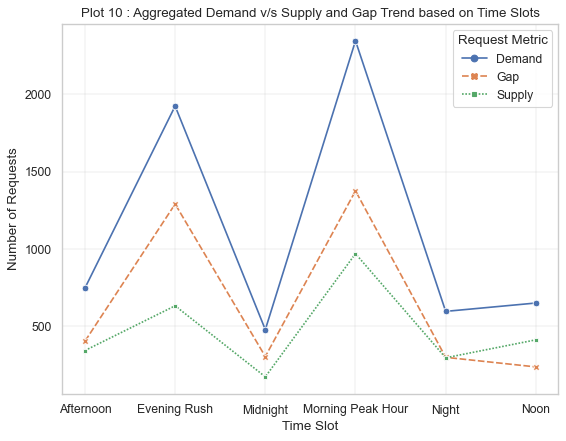

In [43]:
plt.figure(figsize=(8,6),dpi=80)
ax = sns.lineplot(data=uber_timeslot_total_metric,x='Time Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Plot 10 : Aggregated Demand v/s Supply and Gap Trend based on Time Slots',fontsize=12)
plt.show()

Plot 10. clearly shows that the timeslot with the highest gap are Morning Peak Hour and Evening Rush.
#### `Observation 'a'`. Time-slots when highest gap exists : Morning Peak Hour and Evening Rush

In [44]:
uber_city_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot_city,columns='Status',values='Number of Requests',index='Time Slot')
uber_city_timeslot_transpose = uber_city_timeslot_transpose.reset_index().rename_axis(None,axis=1)

uber_city_timeslot_transpose['Demand'] = uber_city_timeslot_transpose.sum(axis=1)
uber_city_timeslot_transpose['Supply'] = uber_city_timeslot_transpose['Trip Completed']
uber_city_timeslot_transpose['Gap'] = uber_city_timeslot_transpose['Demand'] - uber_city_timeslot_transpose['Supply']

In [45]:
uber_city_timeslot_transpose

,Time Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Afternoon,34,89,180,303,180,123
1,Evening Rush,44,54,334,432,334,98
2,Midnight,60,125,94,279,94,185
3,Morning Peak Hour,873,437,535,1845,535,1310
4,Night,22,109,132,263,132,131
5,Noon,33,123,229,385,229,156


In [46]:
uber_city_timeslot_total_metric = pd.melt(uber_city_timeslot_transpose.loc[:,['Time Slot','Demand','Supply','Gap']], id_vars=['Time Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_city_timeslot_total_metric = uber_city_timeslot_total_metric.sort_values(['Time Slot','Request Metric'])
uber_city_timeslot_total_metric.head()

,Time Slot,Request Metric,Number of Requests
0,Afternoon,Demand,303
12,Afternoon,Gap,123
6,Afternoon,Supply,180
1,Evening Rush,Demand,432
13,Evening Rush,Gap,98


In [47]:
uber_airport_timeslot_transpose = pd.pivot_table(data=uber_status_by_time_slot_airport,columns='Status',values='Number of Requests',index='Time Slot')
uber_airport_timeslot_transpose = uber_airport_timeslot_transpose.reset_index().rename_axis(None,axis=1)
uber_airport_timeslot_transpose['Demand'] = uber_airport_timeslot_transpose.sum(axis=1)
uber_airport_timeslot_transpose['Supply'] = uber_airport_timeslot_transpose['Trip Completed']
uber_airport_timeslot_transpose['Gap'] = uber_airport_timeslot_transpose['Demand'] - uber_airport_timeslot_transpose['Supply']

In [48]:
uber_airport_timeslot_transpose

,Time Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Afternoon,44,237,164,445,164,281
1,Evening Rush,87,1106,299,1492,299,1193
2,Midnight,2,118,80,200,80,120
3,Morning Peak Hour,32,34,435,501,435,66
4,Night,3,166,165,334,165,169
5,Noon,30,52,184,266,184,82


In [49]:
uber_airport_timeslot_total_metric = pd.melt(uber_airport_timeslot_transpose.loc[:,['Time Slot','Demand','Supply','Gap']], id_vars=['Time Slot'], var_name="Request Metric", value_name="Number of Requests")
uber_airport_timeslot_total_metric = uber_airport_timeslot_total_metric.sort_values(['Time Slot','Request Metric'])
uber_airport_timeslot_total_metric.head()

,Time Slot,Request Metric,Number of Requests
0,Afternoon,Demand,445
12,Afternoon,Gap,281
6,Afternoon,Supply,164
1,Evening Rush,Demand,1492
13,Evening Rush,Gap,1193


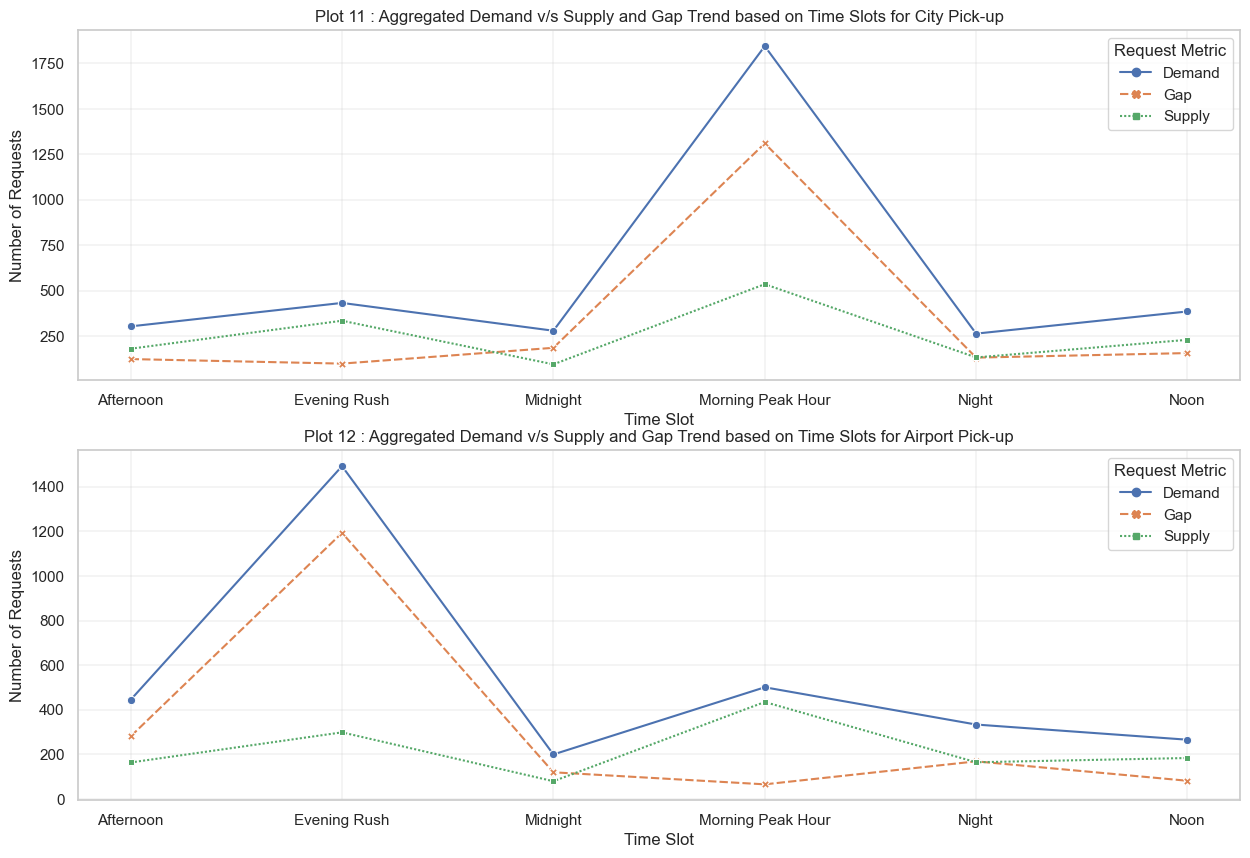

In [50]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=uber_city_timeslot_total_metric,x='Time Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title('Plot 11 : Aggregated Demand v/s Supply and Gap Trend based on Time Slots for City Pick-up')

plt.subplot(2, 1, 2)
ay = sns.lineplot(data=uber_airport_timeslot_total_metric,x='Time Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ay.set_title('Plot 12 : Aggregated Demand v/s Supply and Gap Trend based on Time Slots for Airport Pick-up')
plt.show()

From Plot 11 and 12 it is evident that the Demand vs Supply gap for Morning Peak Hour is most severe for requests from City to Airport. The gap is due to large number of requests being cancelled as depicted in Plot 6 and 7.
#### `Observation 'b'`. Requests where Highest gap exists in Identified time-slots : City to Airport